In [1]:
import os
import requests
import tarfile
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


Using TensorFlow backend.


In [2]:
class Download():
    def __init__(self, data_url, data_directory):
        self.data_directory = data_directory
        self.data_url = data_url
        self.data_file = data_url.split("/")[-1]
        self.data_file_target = os.path.normpath(data_directory + 
                                                 os.path.sep + 
                                                 self.data_file)
    
    @staticmethod
    def download_data(d_url, d_directory, verbose=False):
        """Download data to local directory

        Parameters
        ----------
        d_directory : str, path to directory to save file
        d_url : str, URL to download file
        """
        if verbose:
                print('Downloading data from %s...' % d_url)
        d_file = d_url.split("/")[-1]
        d_file_target = os.path.normpath(d_directory + os.path.sep + d_file)
        if not os.path.exists(d_file_target):
            res = requests.get(d_url)
            with open(d_file_target, "wb") as f:
                f.write(res.content)
            if verbose:
                print('Data is located in %s' % d_directory)
        else:
            print('Download file already exists in {}'.format(d_directory))
    
    @staticmethod
    def extract_files(d_file, d_directory=".", verbose=False):
        """Extract tar or tar.gz archive files
        
        Parameters
        ----------
        d_file : str, file name of archive to extract
        d_directory : str, path to directory to save file
        """
        if d_file.endswith("tar.gz") or d_file.endswith("tgz"):
            tar = tarfile.open(d_file, "r:gz")
            tar.extractall(path=d_directory)
            tar.close()
        elif d_file.endswith("tar") or d_file.endswith("tarfile"):
            tar = tarfile.open(d_file, "r:")
            tar.extractall(path=d_directory)
            tar.close()
        if verbose:
            print("Files extracted successfully to {}".format(d_directory))
            
    def extract(self, verbose=False):
        self.download_data(self.data_url, self.data_directory, verbose)
        self.extract_files(self.data_file_target, self.data_directory, verbose)

## Download Specific Datasets

In [ ]:
directory = os.path.normpath("")

### Test Image Download

In [8]:
gs = Download(_,_)
gs.download_data(d_url="https://upload.wikimedia.org/wikipedia/commons/a/a9/Female_German_Shepherd.jpg",
                 d_directory=directory)

### Stanford Dog Images Download

In [4]:
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
d_images = Download(data_url=url, data_directory=directory)
d_images.extract(verbose=True)

Data is located in .
Files extracted successfully to .


## Visualize Data

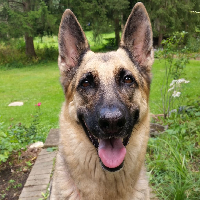

In [12]:
load_img("Female_German_Shepherd.jpg", target_size=(200,200))

In [4]:
class ImageFlow:
    def __init__(self, d_directory, **kwargs):
        self.d_directory = d_directory
        self.img_height = 128
        self.img_width = 128
        self.shear_range = 0.2
        self.zoom_range = 0.2
        self.horizontal_flip = False
        self.vertical_flip = False
        self.validation_split = 0.2
        self.fillmode = 'nearest'

        self.seed = None
        self.batch_size = 10
        self.class_mode = 'categorical'

        train_datagen = ImageDataGenerator(rescale=1./255,
                                           shear_range=self.shear_range,
                                           zoom_range=self.zoom_range,
                                           horizontal_flip=self.horizontal_flip,
                                           vertical_flip=self.vertical_flip,
                                           validation_split=0.2,  # percent of images used for validation
                                           **kwargs)

        self.train_generator = train_datagen.flow_from_directory(
            self.d_directory,
            target_size=(self.img_height, self.img_width),
            batch_size=self.batch_size,
            class_mode=self.class_mode,
            seed=self.seed,
            subset='training')  # set as training data

        self.validation_generator = train_datagen.flow_from_directory(
            self.d_directory,  # same directory as training data
            target_size=(self.img_height, self.img_width),
            batch_size=self.batch_size,
            class_mode=self.class_mode,
            seed=self.seed,
            subset='validation')  # set as validation data
        
        test_datagen = ImageDataGenerator(rescale=1./255)
        self.test_generator = test_datagen.flow_from_directory(
            self.d_directory,
            target_size=(self.img_height, self.img_width),
            batch_size=self.batch_size,
            class_mode=self.class_mode,
            seed=self.seed,
            shuffle=False)
        
    @staticmethod
    def display_images(img_generator, n=15, cols=5):
        import math
        import numpy as np
        import matplotlib.pyplot as plt
        class_mapper = {v: k for k, v in img_generator.class_indices.items()}

        rows = int(math.ceil(n / cols))
        plt.figure(figsize=(cols * 3, rows * 3))
        i = 0
        while True:
            a = next(img_generator)
            for j, image_array in enumerate(a[0]):  # image arrays
                if i == n:
                    return plt.show()
                plt.subplot(rows, cols, i + 1)
                plt.axis('off')
                plt.imshow(image_array)
                plt.title(class_mapper[np.argmax(a[1][j])])
                i += 1

In [5]:
iflow = ImageFlow(d_directory=d_images.data_directory + os.path.sep + "Images")

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.
Found 20580 images belonging to 120 classes.


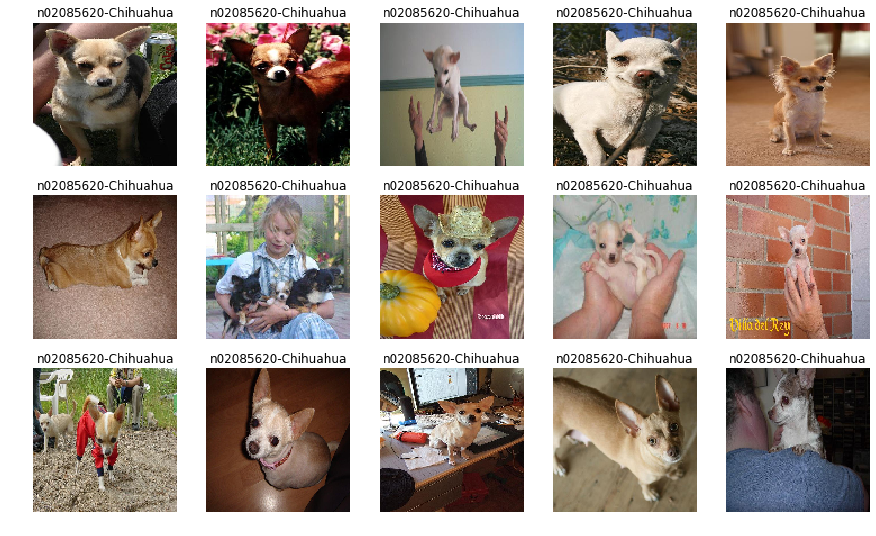

In [6]:
iflow.display_images(iflow.test_generator)